# Get rid of lines of sight with monsters 

In [1]:
import h5py
import numpy as np
from matplotlib import pyplot as plt

### Read the data from both files

In [2]:
# specify the path to the two files with Lyman alpha skewers, with (ON) and without (OFF) self-shielding 
fname_on='data/spectra_ASTRID_z2.5_500x500x2500.hdf5'

In [3]:
with h5py.File(fname_on,'r') as f:
    tau_on = f['tau/H/1/1215'][:]
    colden = f['colden']['H/1'][:]
    axes = f['spectra/axes'][:]
    # (x,y,z) start of the skewers, in kpc/h
    cofm_hkpc = f['spectra/cofm'][:]

In [4]:
# box lenght in Mpc/h
# this information should be stored in the HDF5, but I couldn't find it... so added it by hand
L_hMpc=250
# number of skewers per side (500)
Nsk=int(np.sqrt(colden.shape[0]))
print(Nsk,'skewers per side')
# number of pixels / cells per skewer (2500)
Np=int(colden.shape[1])
print(Np,'pixels per skewer')
# pixel width (in Mpc/h)
dz_hMpc=L_hMpc/Np
print('pixel width = {:.3f} Mpc/h'.format(dz_hMpc))
# minimum separation between skewers (in Mpc/h)
dxy_hMpc=L_hMpc/Nsk
print('skewer separation = {:.3f} Mpc/h'.format(dxy_hMpc))

500 skewers per side
2500 pixels per skewer
pixel width = 0.100 Mpc/h
skewer separation = 0.500 Mpc/h


### Identify lines of sight with DLAs that are too large (their wings wrap around)

In [5]:
# maximum column density at a given line of sight
max_logN_in_sk=np.log10(np.max(colden.reshape([Nsk,Nsk,Np]),axis=2)).flatten()

skewer 6 has log10 N_HI = 21.381


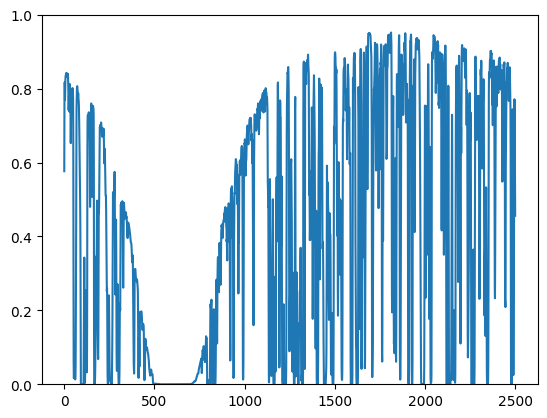

In [6]:
# plot a skewer with a DLA that is just a bit too large (wraps around)
plot_mask = ((max_logN_in_sk > 21.3) & (max_logN_in_sk < 21.4))
plot_isk=np.where(plot_mask)[0][0]
print('skewer {} has log10 N_HI = {:.3f}'.format(plot_isk, max_logN_in_sk.flatten()[plot_isk]))
plt.ylim(0,1)
plt.plot(np.exp(-tau_on[plot_isk]));

In [7]:
# let's get rid of all lines of sight with a DLA larger than 21.3
max_logN_mask=21.3
mask_sk=(max_logN_in_sk > max_logN_mask)
print('{} skewers are masked, {:.4f} %'.format(np.sum(plot_mask), 100*np.sum(plot_mask)/(Nsk**2)))

1242 skewers are masked, 0.4968 %
